# Importar librerias

In [ ]:
# Instalar librerias si es necesario
#!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Cargar los datos

In [5]:
# Cambia el nombre del archivo por el tuyo
df = pd.read_csv('student_lifestyle_dataset.csv')

# Ver primeros datos
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2

# Informacion basica del dataset

In [6]:
print("Informacion del dataset:")
print(df.info())

print("\nEstadisticas basicas:")
print(df.describe())

Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None

Estadisticas basicas:
        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   10

# Preparar los datos

In [7]:
# Codificar nivel de estres si es texto
if 'Stress_Level' in df.columns:
    le = LabelEncoder()
    df['Stress_Level_Num'] = le.fit_transform(df['Stress_Level'])
    print("Niveles de estres codificados:", dict(zip(le.classes_, le.transform(le.classes_))))

# Crear transformaciones no lineales para horas de sueño
df['Sleep_Hours_Squared'] = df['Sleep_Hours_Per_Day'] ** 2
df['Sleep_Hours_Cubed'] = df['Sleep_Hours_Per_Day'] ** 3

Niveles de estres codificados: {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}


# Matriz de correlacion

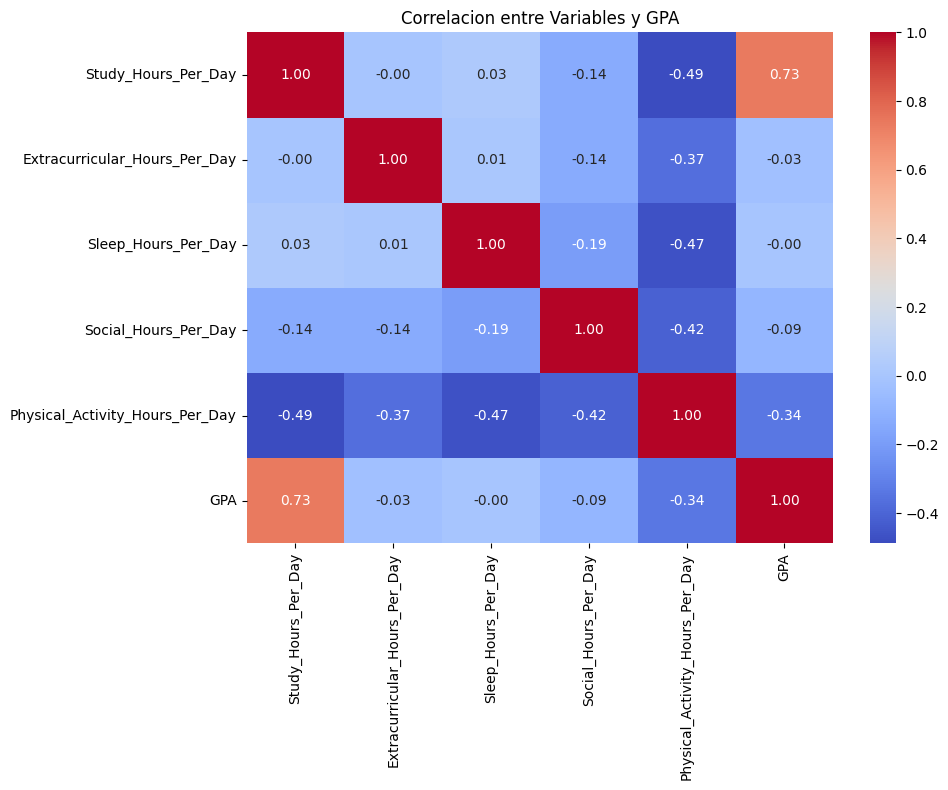

In [8]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                'Physical_Activity_Hours_Per_Day', 'GPA']

corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlacion entre Variables y GPA')
plt.tight_layout()
plt.show()

# Graficos de relaciones individuales

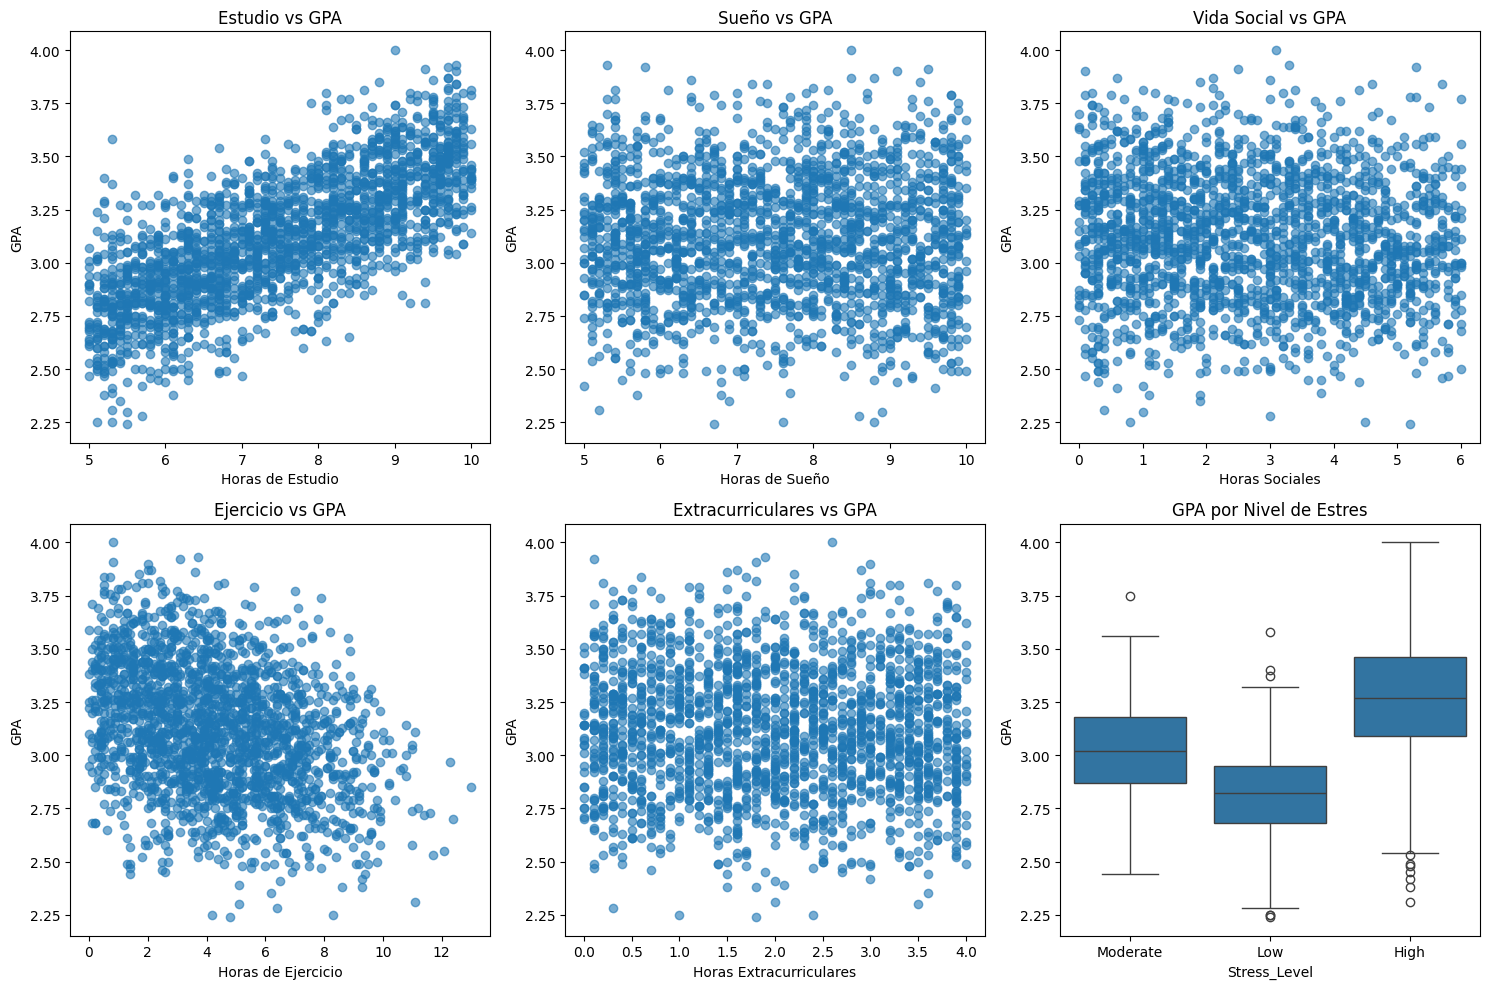

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Estudio vs GPA
axes[0,0].scatter(df['Study_Hours_Per_Day'], df['GPA'], alpha=0.6)
axes[0,0].set_xlabel('Horas de Estudio')
axes[0,0].set_ylabel('GPA')
axes[0,0].set_title('Estudio vs GPA')

# Sueño vs GPA
axes[0,1].scatter(df['Sleep_Hours_Per_Day'], df['GPA'], alpha=0.6)
axes[0,1].set_xlabel('Horas de Sueño')
axes[0,1].set_ylabel('GPA')
axes[0,1].set_title('Sueño vs GPA')

# Actividad Social vs GPA
axes[0,2].scatter(df['Social_Hours_Per_Day'], df['GPA'], alpha=0.6)
axes[0,2].set_xlabel('Horas Sociales')
axes[0,2].set_ylabel('GPA')
axes[0,2].set_title('Vida Social vs GPA')

# Actividad Fisica vs GPA
axes[1,0].scatter(df['Physical_Activity_Hours_Per_Day'], df['GPA'], alpha=0.6)
axes[1,0].set_xlabel('Horas de Ejercicio')
axes[1,0].set_ylabel('GPA')
axes[1,0].set_title('Ejercicio vs GPA')

# Actividades Extracurriculares vs GPA
axes[1,1].scatter(df['Extracurricular_Hours_Per_Day'], df['GPA'], alpha=0.6)
axes[1,1].set_xlabel('Horas Extracurriculares')
axes[1,1].set_ylabel('GPA')
axes[1,1].set_title('Extracurriculares vs GPA')

# Estres vs GPA
if 'Stress_Level' in df.columns:
    sns.boxplot(data=df, x='Stress_Level', y='GPA', ax=axes[1,2])
    axes[1,2].set_title('GPA por Nivel de Estres')

plt.tight_layout()
plt.show()

# Analisis de sueño no lineal

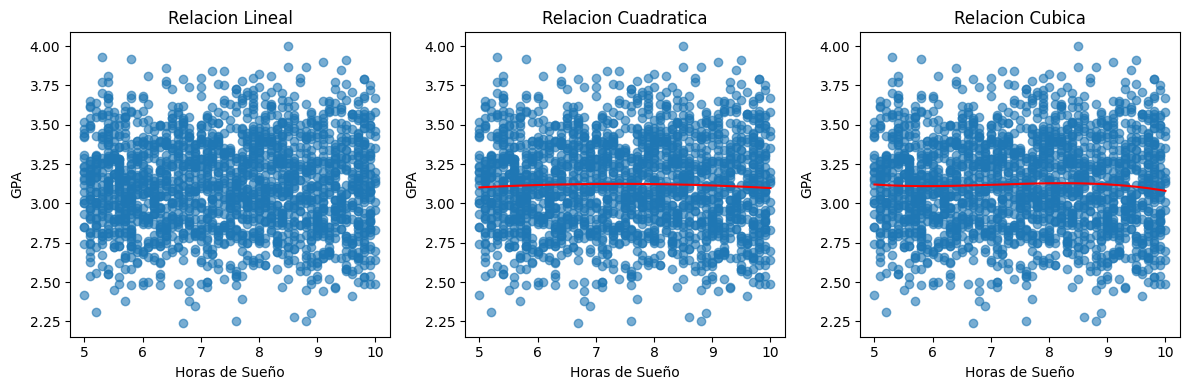

In [10]:
plt.figure(figsize=(12, 4))

# Lineal
plt.subplot(1, 3, 1)
plt.scatter(df['Sleep_Hours_Per_Day'], df['GPA'], alpha=0.6)
plt.xlabel('Horas de Sueño')
plt.ylabel('GPA')
plt.title('Relacion Lineal')

# Cuadratica
plt.subplot(1, 3, 2)
sleep_sorted = df.sort_values('Sleep_Hours_Per_Day')
z = np.polyfit(sleep_sorted['Sleep_Hours_Per_Day'], sleep_sorted['GPA'], 2)
p = np.poly1d(z)
plt.scatter(df['Sleep_Hours_Per_Day'], df['GPA'], alpha=0.6)
plt.plot(sleep_sorted['Sleep_Hours_Per_Day'], p(sleep_sorted['Sleep_Hours_Per_Day']), 'r-')
plt.xlabel('Horas de Sueño')
plt.ylabel('GPA')
plt.title('Relacion Cuadratica')

# Cubica
plt.subplot(1, 3, 3)
z_cubic = np.polyfit(sleep_sorted['Sleep_Hours_Per_Day'], sleep_sorted['GPA'], 3)
p_cubic = np.poly1d(z_cubic)
plt.scatter(df['Sleep_Hours_Per_Day'], df['GPA'], alpha=0.6)
plt.plot(sleep_sorted['Sleep_Hours_Per_Day'], p_cubic(sleep_sorted['Sleep_Hours_Per_Day']), 'r-')
plt.xlabel('Horas de Sueño')
plt.ylabel('GPA')
plt.title('Relacion Cubica')

plt.tight_layout()
plt.show()

# Preparar datos para regresion

In [11]:
# Variables predictoras
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
        'Sleep_Hours_Per_Day', 'Sleep_Hours_Squared', 'Sleep_Hours_Cubed',
        'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]

# Variable a predecir
y = df['GPA']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresion lineal

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)

print("RESULTADOS DEL MODELO:")
print(f"R² en entrenamiento: {model.score(X_train, y_train):.4f}")
print(f"R² en prueba: {model.score(X_test, y_test):.4f}")
print(f"Error cuadratico medio: {mean_squared_error(y_test, y_pred):.4f}")

RESULTADOS DEL MODELO:
R² en entrenamiento: 0.5385
R² en prueba: 0.5499
Error cuadratico medio: 0.0420


# Coeficientes del modelo

In [13]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\nIMPACTO DE CADA VARIABLE EN GPA:")
print(coeficientes)


IMPACTO DE CADA VARIABLE EN GPA:
                          Variable  Coeficiente
0              Study_Hours_Per_Day     0.149117
2              Sleep_Hours_Per_Day    -0.125797
3              Sleep_Hours_Squared     0.016686
1    Extracurricular_Hours_Per_Day    -0.014745
6  Physical_Activity_Hours_Per_Day    -0.004527
5             Social_Hours_Per_Day    -0.004048
4                Sleep_Hours_Cubed    -0.000768


# Modelo estadistico detallado

In [14]:
X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()

print("\nMODELO ESTADISTICO COMPLETO:")
print(model_sm.summary())


MODELO ESTADISTICO COMPLETO:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        04:13:55   Log-Likelihood:                 358.38
No. Observations:                2000   AIC:                            -702.8
Df Residuals:                    1993   BIC:                            -663.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Analizar nivel de estres

In [15]:
if 'Stress_Level_Num' in df.columns:
    print("\nANALISIS DE ESTRES:")

    X_stress = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day',
                   'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']]
    y_stress = df['Stress_Level_Num']

    model_stress = LinearRegression()
    model_stress.fit(X_stress, y_stress)

    coef_stress = pd.DataFrame({
        'Variable': X_stress.columns,
        'Coeficiente': model_stress.coef_
    }).sort_values('Coeficiente', key=abs, ascending=False)

    print("Impacto en nivel de estres:")
    print(coef_stress)


ANALISIS DE ESTRES:
Impacto en nivel de estres:
                          Variable  Coeficiente
0              Study_Hours_Per_Day    -0.303929
1              Sleep_Hours_Per_Day     0.184197
4                              GPA    -0.134664
2             Social_Hours_Per_Day     0.007316
3  Physical_Activity_Hours_Per_Day    -0.006717


# Grafico de importancia de variables

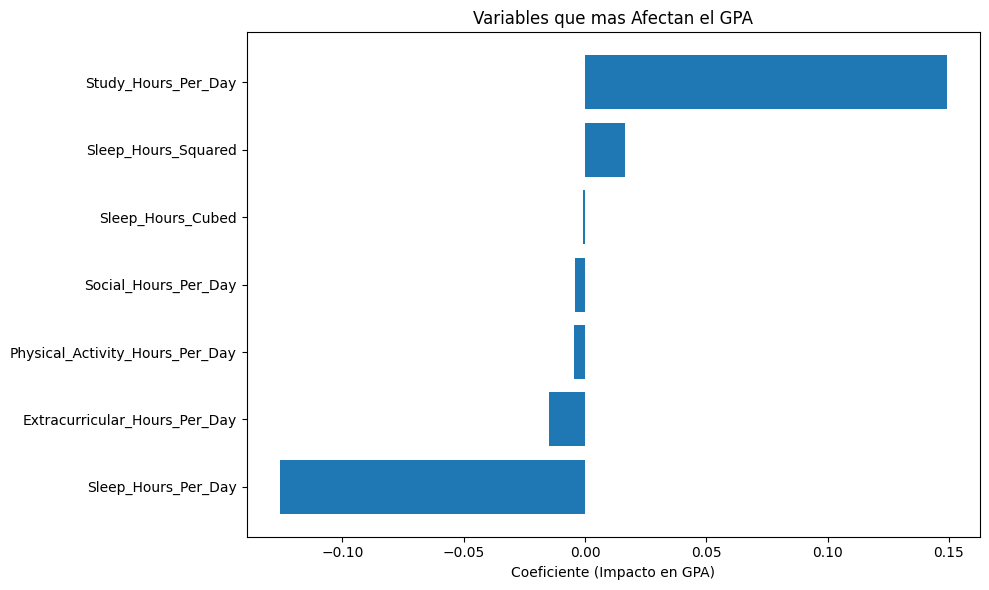

In [16]:
plt.figure(figsize=(10, 6))
coef_sorted = coeficientes.sort_values('Coeficiente', ascending=True)
plt.barh(coef_sorted['Variable'], coef_sorted['Coeficiente'])
plt.xlabel('Coeficiente (Impacto en GPA)')
plt.title('Variables que mas Afectan el GPA')
plt.tight_layout()
plt.show()